<a href="https://colab.research.google.com/github/stevenkeezer/Convolutional-Nueral-Networks/blob/main/Convolutional_Nueral_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

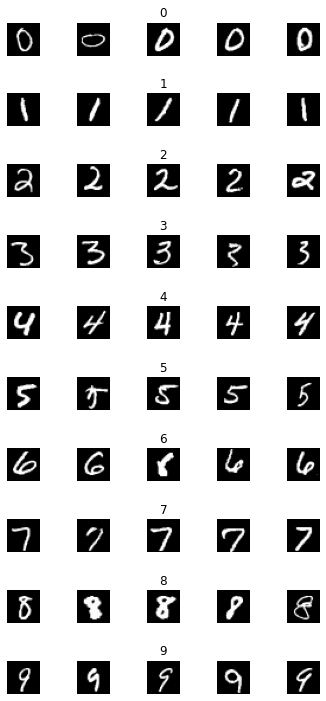

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


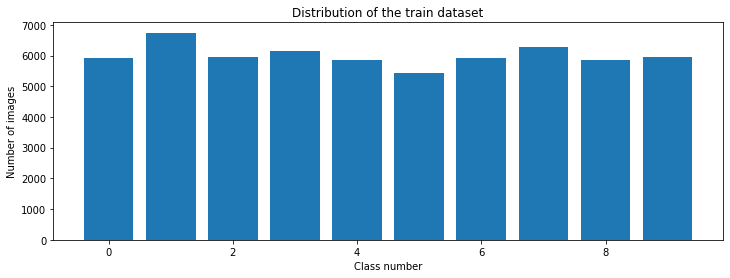

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)             

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 1s 8ms/step - loss: 0.2313 - accuracy: 0.9274 - val_loss: 0.0487 - val_accuracy: 0.9860
Epoch 2/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 3/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0618 - accuracy: 0.9814 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 4/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0461 - val_accuracy: 0.9880
Epoch 5/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0342 - val_accuracy: 0.9917
Epoch 7/10
135/135 [==============================] - 1s 6ms/step - loss: 0.0454 - accuracy: 0.9855 - val_loss: 0.0386 - val_accuracy: 0.9907
Epoch 

Text(0.5, 0, 'epoch')

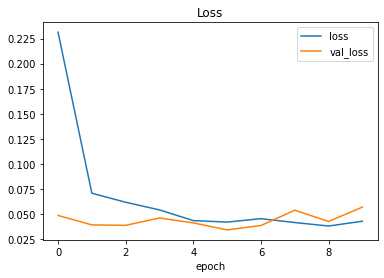

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

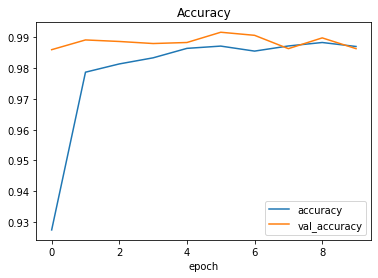

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

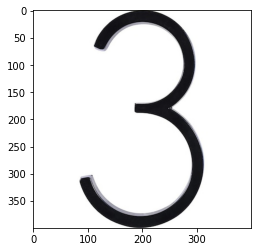

In [ ]:
import requests
from PIL import Image

url = 'https://mobileimages.lowes.com/product/converted/045899/045899002063.jpg?size=xl'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


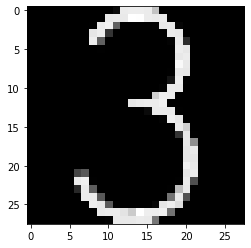

In [ ]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [ ]:
 img = img/255
 img = img.reshape(1, 28, 28, 1) 

In [ ]:
prediction = model.predict_classes(img)
print('predicted digit:', str(prediction))

predicted digit: [3]
